In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


<div style="background-color: #f0f0f0; border: 3px double #9ACD32; padding: 10px;text-align: center;">
    <h2 style="color: #006400; font-size: 25px; font-family: Arial;font-weight: bold;"> Data Overview </h2>
</div>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<h2 style="color: #006400; font-size: 20px; font-family: Arial;font-weight: bold;"> 1. Read Data </h2>
</div>

### Train data

In [3]:
train_df = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
print('Number of rows:', train_df.shape[0])
print('Number of columns:', train_df.shape[1])

Number of rows: 8693
Number of columns: 14


In [4]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [7]:
train_df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

### Test data

In [8]:
test_df = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')
print('Number of rows:', train_df.shape[0])
print('Number of columns:', train_df.shape[1])

Number of rows: 8693
Number of columns: 14


In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [10]:
test_df.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

<div style="background-color: #f0f0f0; border: 3px double #9ACD32; padding: 10px;text-align: center;">
    <h2 style="color: #006400; font-size: 25px; font-family: Arial;font-weight: bold;"> EDA </h2>
</div>

In [11]:
space_palette = ['#001F3F', '#0074D9', '#7FDBFF', '#39CCCC', '#3D9970', '#2ECC40', '#01FF70', '#FFDC00', '#FF851B', '#FF4136']

sns.set_palette(space_palette)
sns.set_style("white")
sns.set_context("notebook")

custom_font = {'fontname':'Arial'}

bg_color = '#ADD8E6' 

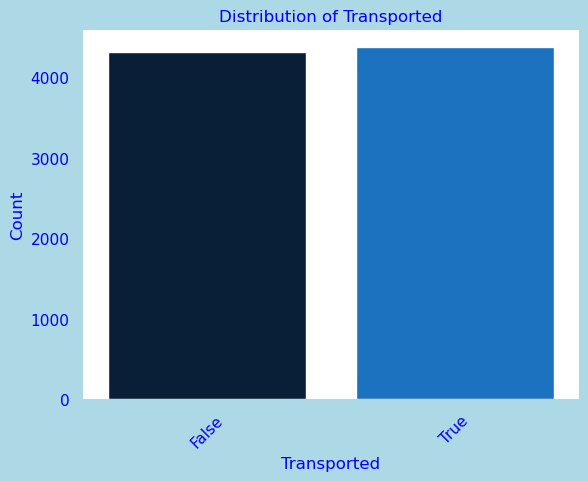

In [12]:
plt.figure(facecolor=bg_color)
sns.countplot(data=train_df, x='Transported')
plt.title('Distribution of Transported', **custom_font, color='blue')
plt.xlabel('Transported', **custom_font, color='blue')
plt.ylabel('Count', **custom_font, color='blue')
plt.xticks(rotation=45, fontname='Arial', color='blue')
plt.yticks(fontname='Arial', color='blue')
sns.despine(left=True, bottom=True)
plt.show()

## Numerical variables

<Figure size 640x480 with 0 Axes>

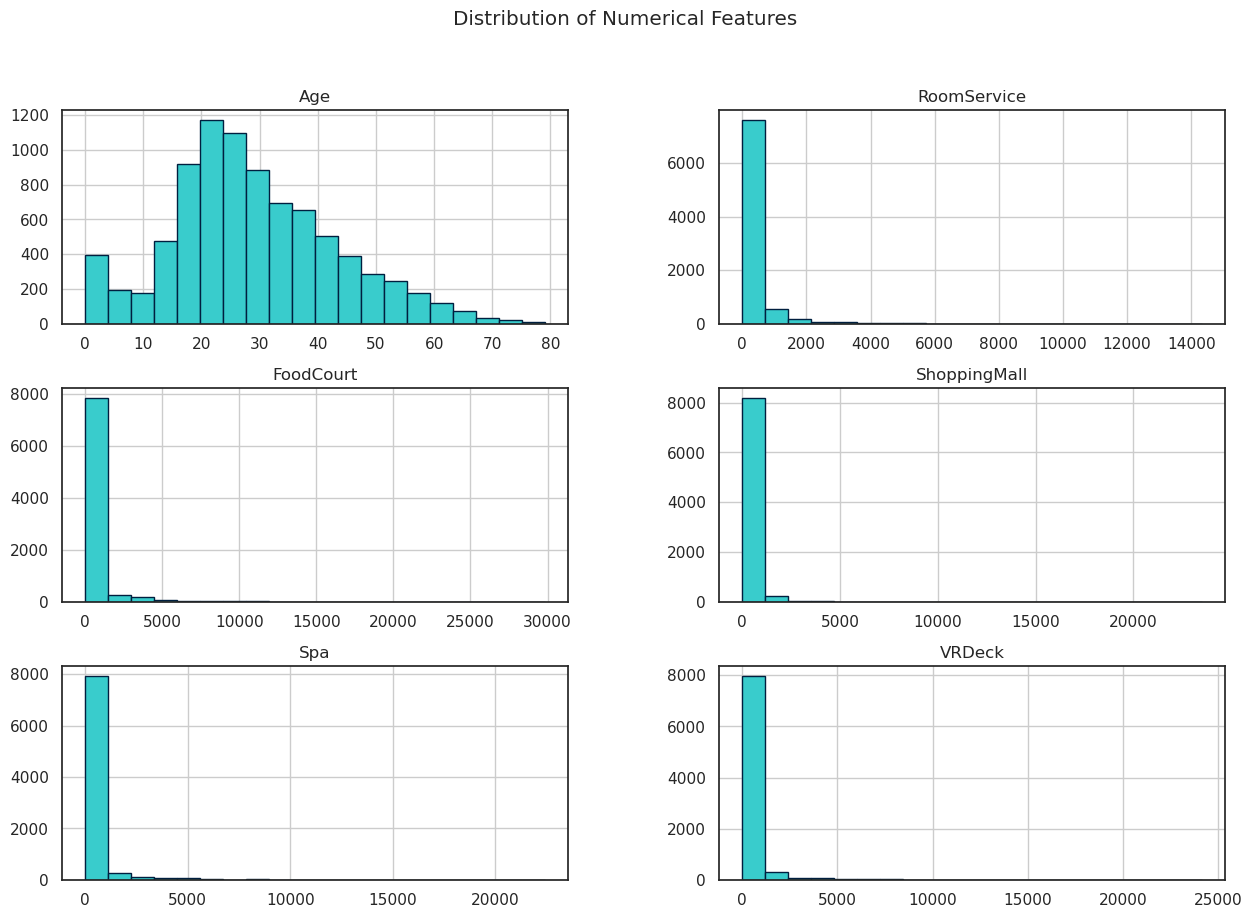

In [13]:
# Distribution of numerical features
numerical_columns = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
plt.figure(facecolor=bg_color)
train_df[numerical_columns].hist(bins=20, figsize=(15, 10), color=space_palette[3], edgecolor = '#001F3F')
plt.suptitle('Distribution of Numerical Features', **custom_font)
plt.show()

Age Distribution:

The positively skewed distribution suggests that the majority of passengers are relatively young, with the mean being pulled upwards by a smaller number of older passengers.
consider normalizing the Age feature to reduce the impact of outliers.

Amenities Billing Amounts:

The majority of passengers not spending much on amenities could indicate that these amenities were not a primary focus for a significant portion of passengers.
create a new feature that represents whether a passenger used any of these amenities at all, to capture potential preferences for luxury services.
The presence of higher billing amounts could indeed indicate outliers. 


Impact on Transported Prediction:

The analysis of amenities' billing amounts could potentially help predict the likelihood of a passenger being transported. Passengers who spent more on luxury amenities might have different behavior, preferences, or socioeconomic status, which could influence their decision to remain on board or be transported.

Feature engineering: create interaction features between amenities and other variables, like VIP status or age groups, to capture potential combined effects.

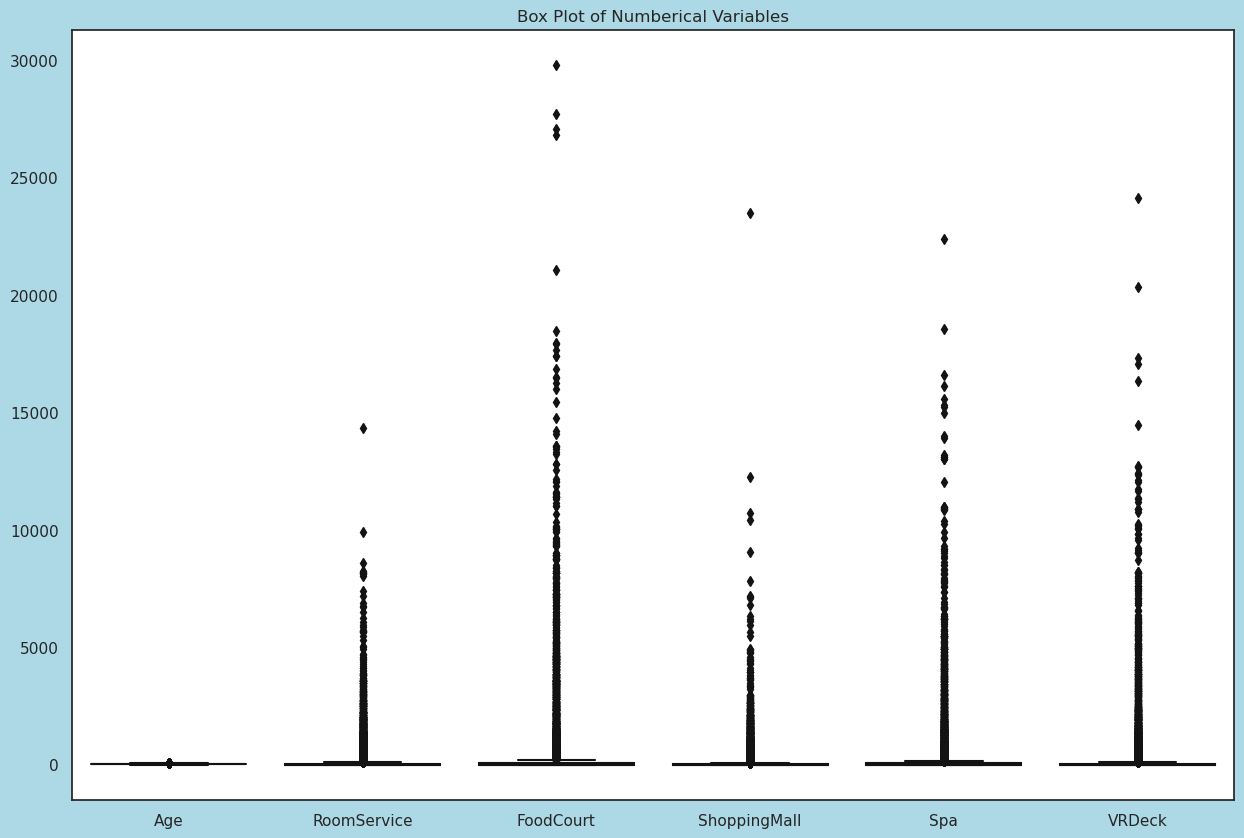

In [14]:
# Detect outliers
plt.figure(facecolor=bg_color, figsize=(15,10))
sns.boxplot(data=train_df[numerical_columns], palette=space_palette, saturation=0.6)
plt.title('Box Plot of Numberical Variables', **custom_font)
plt.show()

food court, spa, vrdeck, roomservice have quite numerous outliers

/tmp/ipykernel_20/1333169776.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train_df.corr()


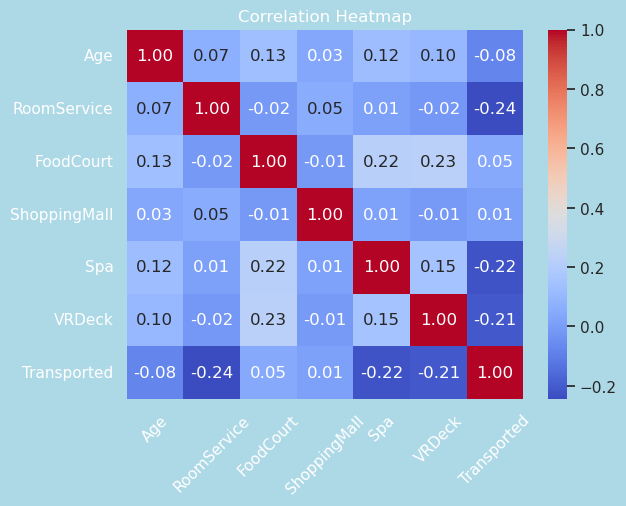

In [15]:
# Pairwise correlation heatmap
corr_matrix = train_df.corr()
plt.figure(facecolor=bg_color)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap', **custom_font, color='white')
plt.xticks(fontname='Arial', color='white', rotation=45)
plt.yticks(fontname='Arial', color='white')
plt.show()

Transported are not correlated to the features, so we can go ahead with all of them

## Categorical variables

#### Handling DeckLevel
Extract the deck level information ('deck/num/side') to get only deck level

In [16]:
train_df['DeckLevel'] = train_df['Cabin'].str.split('/').str[0]
train_df = train_df.drop('Cabin', axis=1)
test_df['DeckLevel'] = test_df['Cabin'].str.split('/').str[0]
test_df = test_df.drop('Cabin', axis=1)

#### Visualizations

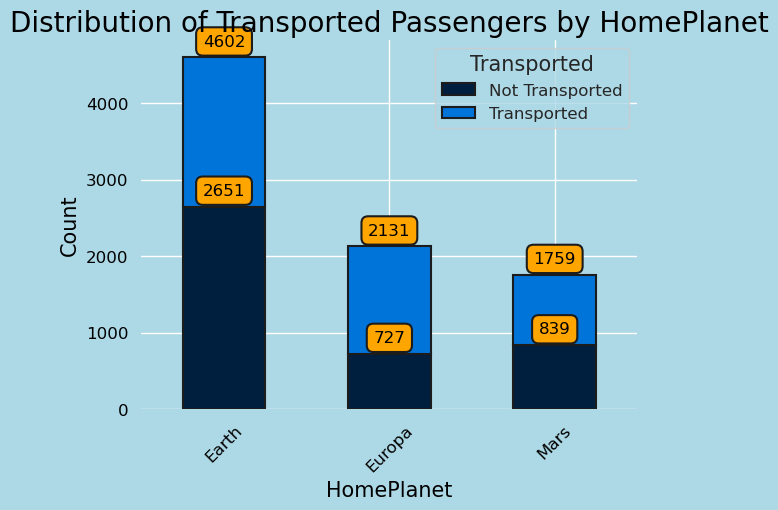

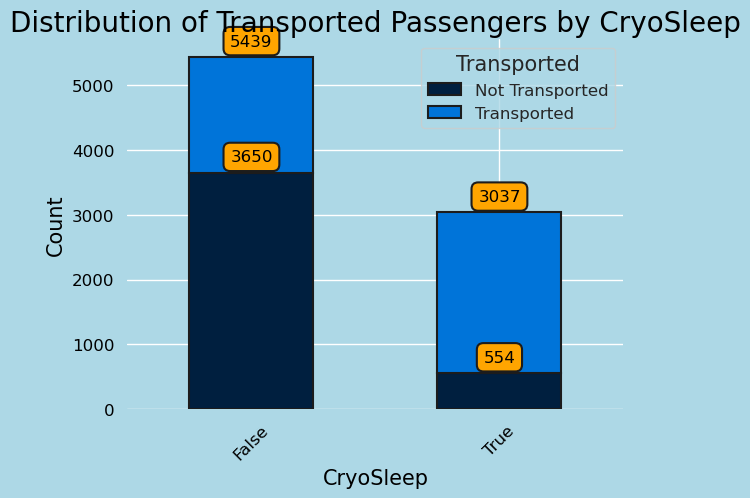

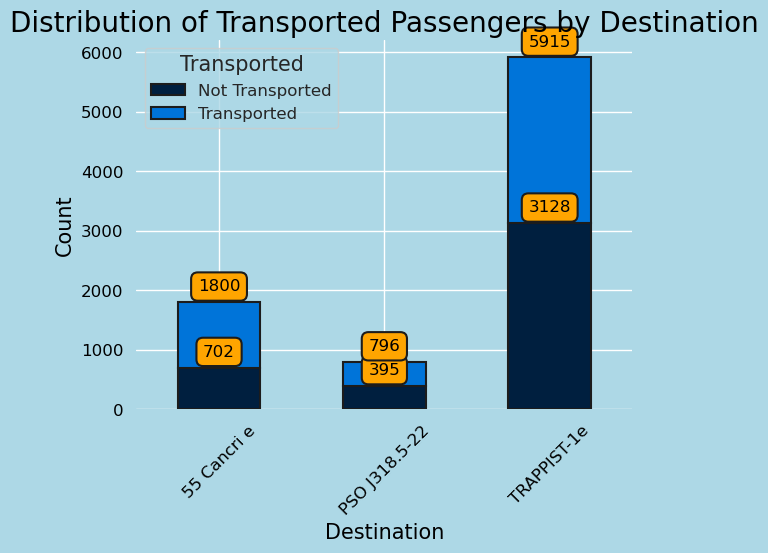

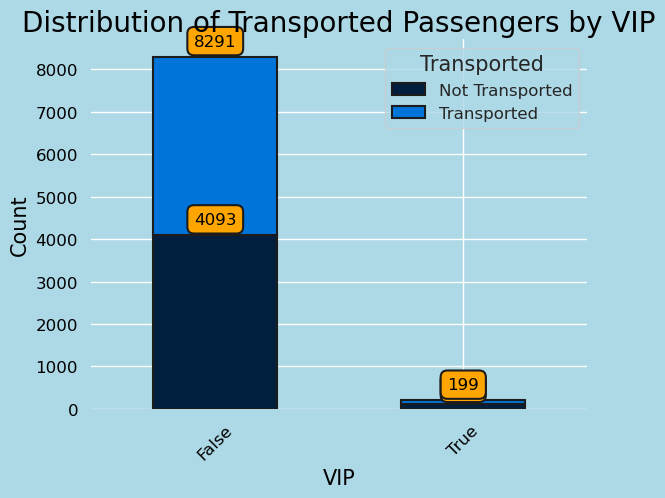

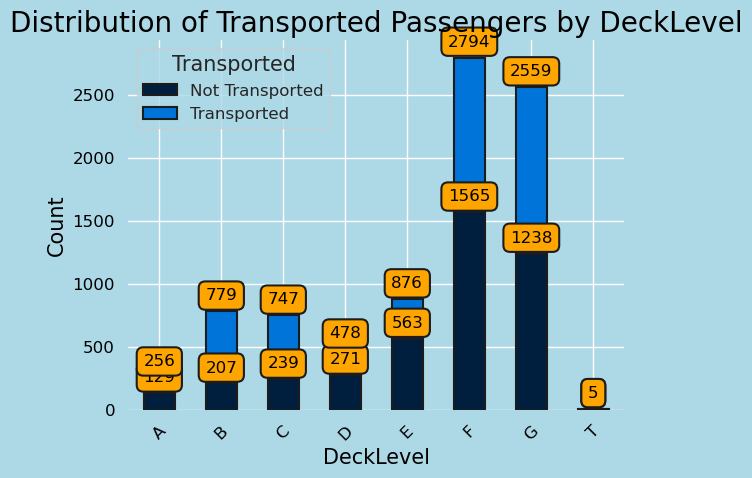

In [17]:
cate_vars = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'DeckLevel']
sns.set_palette(space_palette)
sns.set_style("whitegrid")
sns.set_context("notebook")

custom_font = {'fontname': 'Arial'}

for var in cate_vars:
    sns.set(rc={"axes.facecolor":"#ADD8E6","figure.facecolor":"#ADD8E6"})
    transported_dist = train_df.groupby([var, 'Transported']).size().unstack()
    # Create a stacked bar plot
    transported_dist.plot(kind='bar', stacked=True, color=space_palette, edgecolor='#1c1c1c', linewidth=1.5)
    
    plt.title(f'Distribution of Transported Passengers by {var}', **custom_font, color='black', fontsize=20)
    plt.xlabel(var, **custom_font, color='black', fontsize=15)
    plt.ylabel('Count', **custom_font, color='black', fontsize=15)
    plt.xticks(rotation=45, fontname='Arial', color='black', fontsize=12)
    plt.yticks(fontname='Arial', color='black', fontsize=12)
    plt.legend(title='Transported', labels=['Not Transported', 'Transported'], title_fontsize=15, fontsize=12)
    
    # Display percentage of transported passengers as labels
    for container in plt.gca().containers:
        plt.bar_label(container, label_type="edge", padding=6, size=12, color="black", rotation=0,
                  bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "#1c1c1c", "linewidth": 1.5})
    sns.despine(left=True, bottom=True)
    plt.show()

<div style="background-color: #f0f0f0; border: 3px double #9ACD32; padding: 10px;text-align: center;">
    <h2 style="color: #006400; font-size: 25px; font-family: Arial;font-weight: bold;"> Data Preprocessing </h2>
</div>

## Handling Missing Values

### Categorical Variables

In [18]:
print(train_df['VIP'].isnull().sum())


203


In [19]:
# Mode
mode_vip = train_df['VIP'].mode()[0]
train_df['VIP'] = train_df['VIP'].fillna(mode_vip)
train_df['VIP'] = train_df['VIP'].astype(bool)

# Similarly for the test dataset
test_df['VIP'] = test_df['VIP'].fillna(mode_vip)
test_df['VIP'] = test_df['VIP'].astype(bool)


In [20]:
categorical_columns = ['HomePlanet', 'CryoSleep', 'DeckLevel', 'Destination']
for col in categorical_columns:
    train_df[col] = train_df[col].fillna("Unknown")
    test_df[col] = test_df[col].fillna("Unknown")

In [21]:
# Convert categorical columns to one-hot encoded format
train_df = pd.get_dummies(train_df, columns=categorical_columns, drop_first=True)
test_df = pd.get_dummies(test_df, columns=categorical_columns, drop_first=True)

### Numerical Variables

In [22]:
# Impute missing values in numerical columns with mean
numerical_columns = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
for col in numerical_columns:
    train_df[col] = train_df[col].fillna(train_df[col].mean())
    test_df[col] = test_df[col].fillna(test_df[col].mean())

In [23]:
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PassengerId                8693 non-null   object 
 1   Age                        8693 non-null   float64
 2   VIP                        8693 non-null   bool   
 3   RoomService                8693 non-null   float64
 4   FoodCourt                  8693 non-null   float64
 5   ShoppingMall               8693 non-null   float64
 6   Spa                        8693 non-null   float64
 7   VRDeck                     8693 non-null   float64
 8   Name                       8493 non-null   object 
 9   Transported                8693 non-null   bool   
 10  HomePlanet_Europa          8693 non-null   uint8  
 11  HomePlanet_Mars            8693 non-null   uint8  
 12  HomePlanet_Unknown         8693 non-null   uint8  
 13  CryoSleep_True             8693 non-null   uint8

### Feature Engineering: Family Size
represents the family/group size of each passenger

Larger family sizes might indicate a stronger social network within a group. In the context of the Spaceship Titanic, passengers with larger family sizes might have shared support, decision-making, and coping strategies. This dynamic could impact their likelihood of being transported or not.

In [24]:
# Extract group information from PassengerId (gggg_pp format)
train_df['Group'] = train_df['PassengerId'].apply(lambda x: x.split('_')[0])
test_df['Group'] = test_df['PassengerId'].apply(lambda x: x.split('_')[0])
# Calculate family size by counting the number of members in each group
family_size = train_df['Group'].value_counts()
train_df['FamilySize'] = train_df['Group'].map(family_size)

family_size = test_df['Group'].value_counts()
test_df['FamilySize'] = test_df['Group'].map(family_size)

In [25]:
train_df = train_df.drop(['PassengerId', 'Name', 'Group'], axis=1)
test_df = test_df.drop(['PassengerId', 'Name', 'Group'], axis=1)

## Normalization

In [26]:
print(train_df.var())

Age                          2.056085e+02
VIP                          2.237051e-02
RoomService                  4.352560e+05
FoodCourt                    2.542223e+06
ShoppingMall                 3.569076e+05
Spa                          1.264896e+06
VRDeck                       1.284276e+06
Transported                  2.500156e-01
HomePlanet_Europa            1.850676e-01
HomePlanet_Mars              1.614211e-01
HomePlanet_Unknown           2.259002e-02
CryoSleep_True               2.273342e-01
CryoSleep_Unknown            2.434228e-02
DeckLevel_B                  8.159135e-02
DeckLevel_C                  7.855607e-02
DeckLevel_D                  5.196920e-02
DeckLevel_E                  9.062642e-02
DeckLevel_F                  2.181300e-01
DeckLevel_G                  2.077422e-01
DeckLevel_T                  5.749107e-04
DeckLevel_Unknown            2.237051e-02
Destination_PSO J318.5-22    8.319281e-02
Destination_TRAPPIST-1e      2.174691e-01
Destination_Unknown          2.050

In [27]:
from sklearn.preprocessing import StandardScaler

# Example using Standard Scaler
scaler = StandardScaler()
scaled_features = pd.DataFrame(scaler.fit_transform(train_df), columns=train_df.columns)

print(scaled_features.var())

Age                          1.000115
VIP                          1.000115
RoomService                  1.000115
FoodCourt                    1.000115
ShoppingMall                 1.000115
Spa                          1.000115
VRDeck                       1.000115
Transported                  1.000115
HomePlanet_Europa            1.000115
HomePlanet_Mars              1.000115
HomePlanet_Unknown           1.000115
CryoSleep_True               1.000115
CryoSleep_Unknown            1.000115
DeckLevel_B                  1.000115
DeckLevel_C                  1.000115
DeckLevel_D                  1.000115
DeckLevel_E                  1.000115
DeckLevel_F                  1.000115
DeckLevel_G                  1.000115
DeckLevel_T                  1.000115
DeckLevel_Unknown            1.000115
Destination_PSO J318.5-22    1.000115
Destination_TRAPPIST-1e      1.000115
Destination_Unknown          1.000115
FamilySize                   1.000115
dtype: float64


ADD STRATIFY IN  MODeLLING